# Project STARDUST
Height and Weight analysis of Star Wars Characters\
Yes, Yoda is the shortest

[Data Source](https://www.kaggle.com/datasets/jsphyg/star-wars?resource=download)\
These Python functions also are in an excel file. A treemap of BMIs by species is available as a Power BI .pbix file. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

chars = pd.read_csv('characters.csv')
chars = chars[chars['species'] != 'Droid']  # droids had missing values for weight or height
chars = chars.drop_duplicates(subset = ['name']) # distinct id's but names had duplicates
chars.head()


,id,name,species,gender,height,weight,hair_color,eye_color,skin_color,year_born,homeworld,year_died,description
0,1,Luke Skywalker,Human,Male,1.72,77.0,Blond,Blue,Light,19.0,Tatooine,34.0,The main protagonist of the original trilogy.
1,2,Leia Organa,Human,Female,1.50,49.0,Brown,Brown,Light,19.0,Alderaan,35.0,A leader in the Rebel Alliance and twin sister...
2,3,Darth Vader,Human,Male,2.02,136.0,NaN,Yellow,Pale,41.0,Tatooine,4.0,The Sith Lord formerly known as Anakin Skywalker.
3,4,Yoda,Yoda's species,Male,0.66,17.0,White,Brown,Green,896.0,Unknown,4.0,A wise and powerful Jedi Master.
4,5,Han Solo,Human,Male,1.80,80.0,Brown,Hazel,Light,29.0,Corellia,34.0,A smuggler turned hero in the Rebel Alliance.


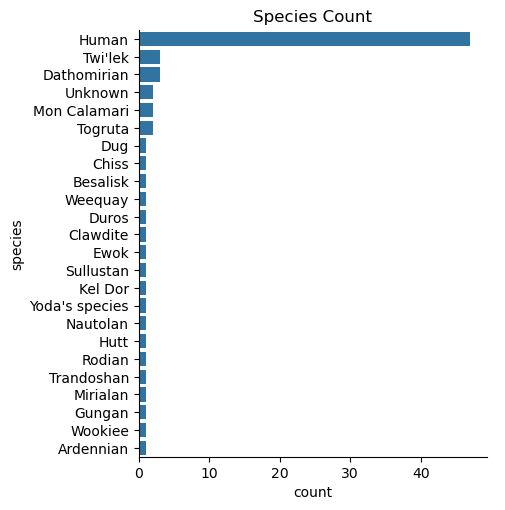

In [2]:
# count plot 
sns.catplot(kind='count', data=chars, y='species', order = chars['species'].value_counts().index)
plt.title('Species Count')
plt.show()

In [3]:
#Weight Aggregations

weight_by_species = chars.groupby('species').agg(
                    mean_weight=('weight','mean'),
                    count_species=('weight','count')
                    ).sort_values('mean_weight',ascending=False)

# Height Aggregation

height_by_species = chars.groupby('species').agg(
                    mean_height = ('height','mean'),
                    count_species = ('species','count')
                    ).sort_values('mean_height', ascending=False)


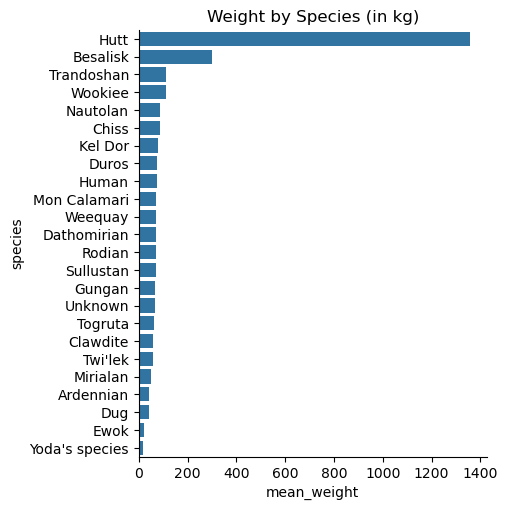

In [4]:
#weight by species
sns.catplot(kind='bar', data=weight_by_species, y='species', x='mean_weight')
plt.title('Weight by Species (in kg)')
plt.show()

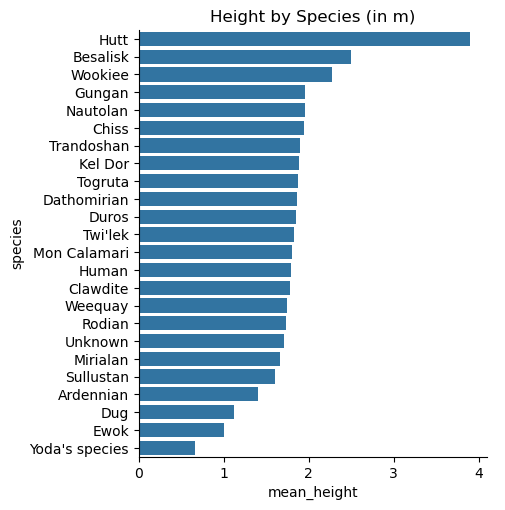

In [5]:
#height by species
sns.catplot(kind='bar', data=height_by_species, y='species', x='mean_height')
plt.title('Height by Species (in m)')
plt.show()

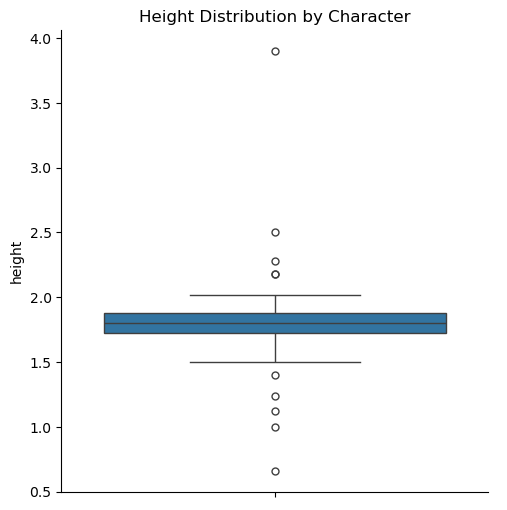

In [6]:
# Height of all characters 

# sns.histplot(data=chars, x='height',binwidth=.1)
# plt.title('Distribution of Heights (in m)')
# plt.xlabel('Height')
# plt.ylabel('Frequency')
# plt.show()

sns.catplot(kind='box', data=chars, y='height') 
plt.title('Height Distribution by Character')
plt.show()


In [7]:
#Are Anakin Skywalker and Darth Vador the same Height?
chars.query('name == "Anakin Skywalker"')['height'].values[0]
chars.query('name == "Darth Vader"')['height'].values[0]

# Anakin = chars[chars['name']=='Anakin Skywalker']
# print(Anakin['height'].values[0])

# SELECT height 
# FROM chars 
# WHERE name IN('Anakin Skywalker', 'Darth Vader');

2.02

In [8]:
#Overall Height Outliers

# Height over 6 ft regardless of species. Pandas .query method does not have SQL's HAVING clause
sql_height_over_6ft = chars.query('height >= 1.83')
#sql_height_over_6ft

height_over_6ft = chars[chars['height'] >= 1.83]
print(height_over_6ft)

q1 = np.nanquantile(chars['height'],0.25)
q3 = np.nanquantile(chars['height'],0.75)
iqr = q3-q1
lower = q1 - 1.5 * iqr
upper = q1 + 1.5 * iqr
outliers = chars[(chars['height'] < lower) | (chars['height'] > upper)].sort_values('height',ascending=True)
#print(outliers)
sql_outliers = chars.query('height < 1.5 | height > 1.95').sort_values('height',ascending=True)
#print(sql_outliers)
#print(chars['height'].describe())

# DECLARE @lower_bound DECIMAL = 1.5;
# DECLARE @upper_bound DECIMAL = 2.1;

# SELECT * FROM chars 
# WHERE (height < @lower_bound) OR (height > @upper_bound)
# ORDER BY height DESC;


    id                  name      species  gender  height  weight  hair_color  \
2    3           Darth Vader        Human    Male    2.02   136.0         NaN   
5    6             Chewbacca      Wookiee    Male    2.28   112.0       Brown   
8    9      Anakin Skywalker        Human    Male    1.88    84.0       Blond   
10  11          Qui-Gon Jinn        Human    Male    1.93    89.0       Brown   
11  12            Mace Windu        Human    Male    1.88    84.0         NaN   
12  13         Jar Jar Binks       Gungan    Male    1.96    66.0         NaN   
13  14           Count Dooku        Human    Male    1.93    80.0       White   
17  18              Kylo Ren        Human    Male    1.89    89.0       Black   
22  23             Boba Fett        Human    Male    1.83    78.0       Black   
23  24            Jango Fett        Human    Male    1.83    79.0       Black   
24  25           General Hux        Human    Male    1.85    75.0         Red   
26  27  Supreme Leader Snoke

In [9]:
# What is Jabba the Hutt's BMI?
Jabba_BMI = chars.loc[chars['name'] == 'Jabba the Hutt', 'weight'].values[0] / \
        chars.loc[chars['name'] == 'Jabba the Hutt', 'height'].values[0]**2
print(Jabba_BMI)

# SELECT weight / POWER(height, 2) AS BMI
# FROM chars
# WHERE name = 'Jabba the Hutt';

89.28336620644313


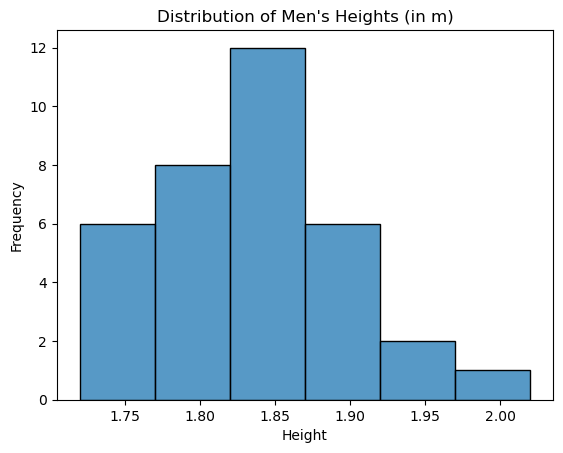

Text(0.5, 1.0, "Men's Heights (in m)")

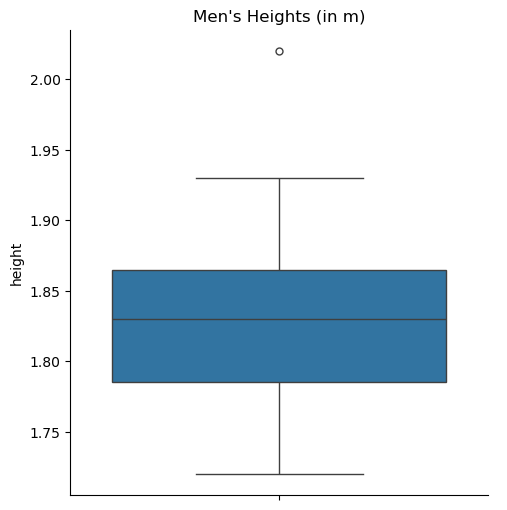

In [10]:
#charts of gentlemen

gentlemen = chars[(chars['species']=='Human') & (chars['gender']=='Male')].sort_values('height',ascending=False)
#sql_gentlemen
sql_gentlemen = chars.query('species == "Human" & gender == "Male"').sort_values('height',ascending=False)

sns.histplot(data=gentlemen, x='height',binwidth=.05)
plt.title('Distribution of Men\'s Heights (in m)')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

sns.catplot(kind='box', data=gentlemen, y='height') 
plt.title('Men\'s Heights (in m)')

# SELECT height FROM chars
# WHERE species = 'Human' AND gender = 'Male'
# ORDER BY height DESC;


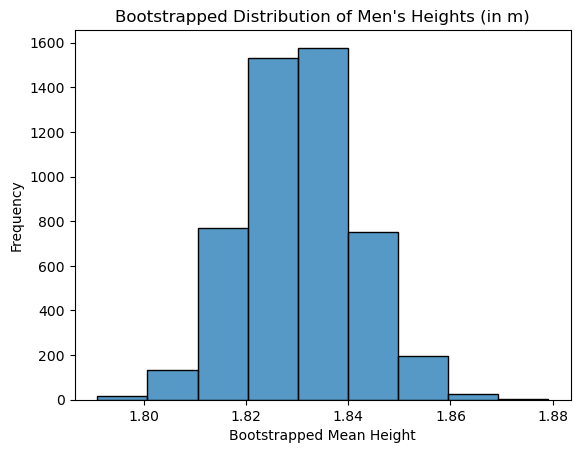

In [11]:
gentlemen = chars[(chars['species']=='Human') & (chars['gender']=='Male')].sort_values('height',ascending=False)

gentlemen_height_mean = []
for i in range(5000):
    gentlemen_height_mean.append(
        gentlemen.sample(frac=1, replace=True)['height'].mean())
    
#convert list to dataframe
df_gentlemen_height_mean = pd.DataFrame({'bootstrapped_mean_height': gentlemen_height_mean})

sns.histplot(data=df_gentlemen_height_mean, x='bootstrapped_mean_height', binwidth=.01)
plt.title('Bootstrapped Distribution of Men\'s Heights (in m)')
plt.xlabel('Bootstrapped Mean Height')
plt.ylabel('Frequency')
plt.show()

# 5'10" 

In [12]:
lower_CI = np.quantile(gentlemen_height_mean,0.025)
upper_CI = np.quantile(gentlemen_height_mean,0.975)

raw_gentlemen_mean_height = gentlemen['height'].mean()
bootstrapped_gentlemen_mean_height = df_gentlemen_height_mean['bootstrapped_mean_height'].mean()

# Print quantile method confidence interval
print((lower_CI, upper_CI))

(1.8091428571428572, 1.8522857142857143)
